In [1]:
%reload_ext autoreload
%autoreload 2
from skimage import io 
import numpy as np
# file = "../vessels/volumes/Lnet_d20_dr12_epsilon9_iter13_SD500_v1_t0_512x512x280.tiff"
file = "../vessels/volumes/Lnet_d35_dr20_epsilon10_iter8_SD500_v1_t0_512x512x280_nofluid.tiff"
data = io.imread(file) # ZYX

In [2]:
print(type(data), "shape:", data.shape)
print(np.max(data), np.min(data))

<class 'numpy.ndarray'> shape: (512, 512, 280)
255 0


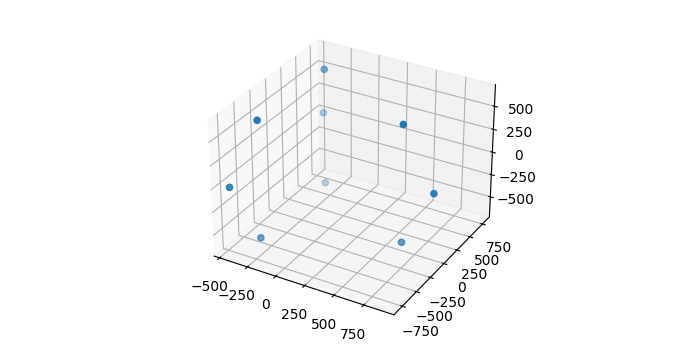

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 900

phi_n = 3
theta_n = 3
phi = np.linspace(0, 2*np.pi, phi_n, endpoint=False)
theta = np.linspace(np.pi/(theta_n+1), np.pi, theta_n, endpoint=False)
# theta = np.pi/(theta_n+1) * np.ones(theta_n)
u, v = np.meshgrid(phi, theta)
x = r*np.cos(u) * np.sin(v) + 0* data.shape[0]/2
y = r*np.sin(u) * np.sin(v) + 0 *data.shape[1]/2
z = r*np.cos(v) + 0*  data.shape[2]/2
# ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)
ax.scatter(x,y,z)
plt.show()

theta,phi: 0.7853981633974483 0.0
theta,phi: 0.7853981633974483 2.0943951023931953
theta,phi: 0.7853981633974483 -2.094395102393196
theta,phi: 1.5707963267948966 0.0
theta,phi: 1.5707963267948966 2.0943951023931953
theta,phi: 1.5707963267948966 -2.094395102393196
theta,phi: 2.356194490192345 0.0
theta,phi: 2.356194490192345 2.0943951023931953
theta,phi: 2.356194490192345 -2.0943951023931957


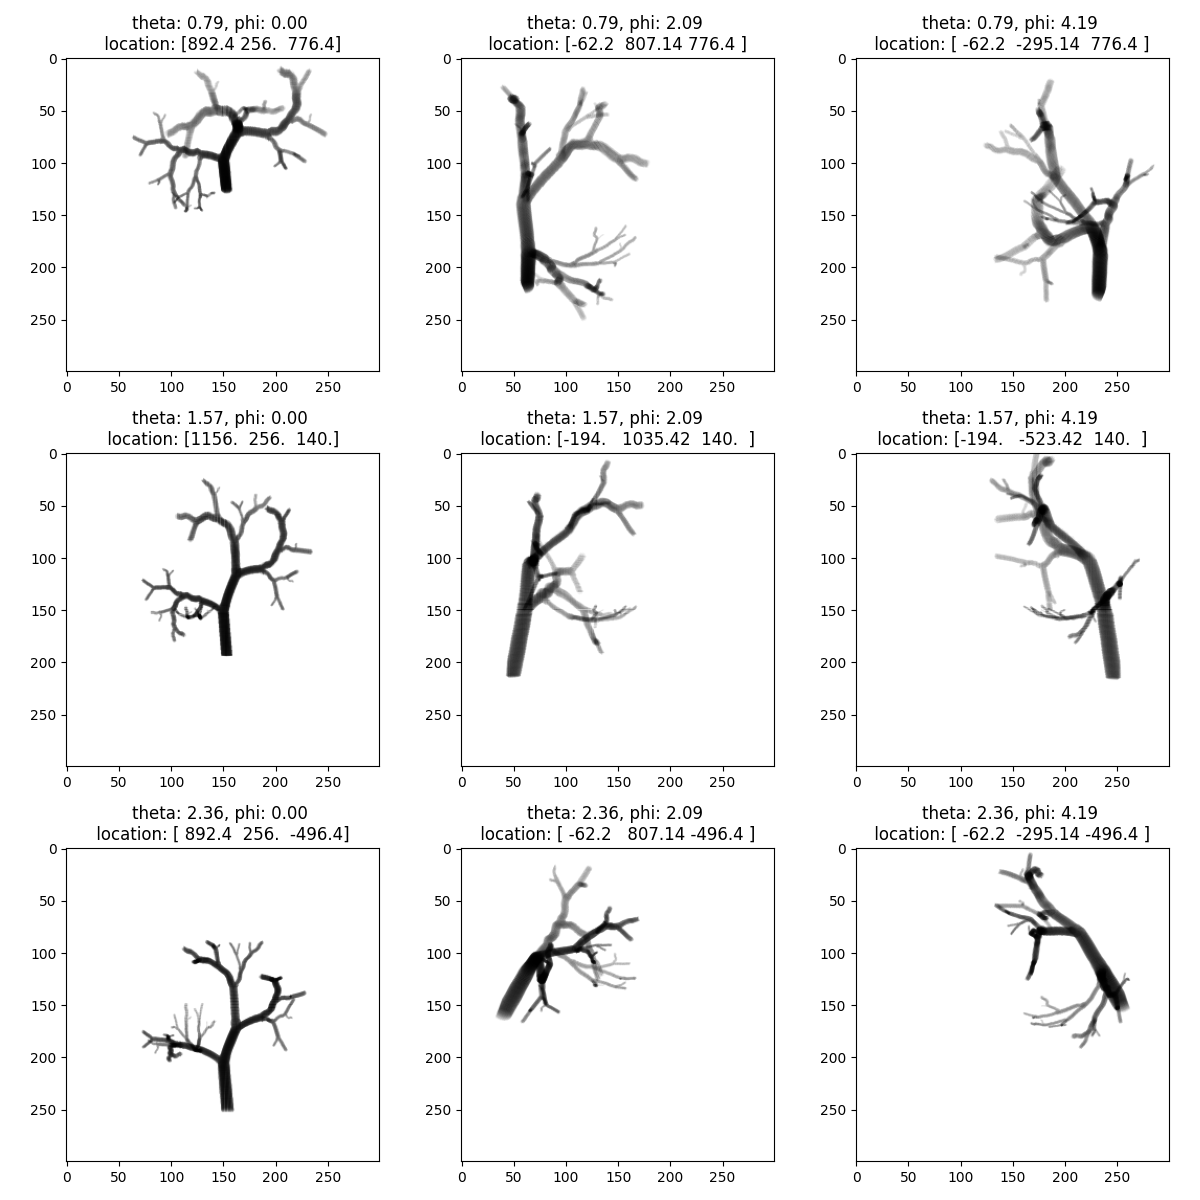

In [6]:
from utils import projector 
my_p = projector(data)
my_p.camera_init(view_angle_x=np.pi/4, view_angle_y=np.pi/4, width=300, height=300)
lookAt = np.array([data.shape[0]/2,data.shape[1]/2,data.shape[2]/2])



fig, ax = plt.subplots(phi_n, theta_n, figsize=(12,12))
np.set_printoptions(precision=2)
for i in range(theta_n):
    for j in range(phi_n):
        location = np.array([x[i,j], y[i,j],z[i,j]]) + lookAt
        my_p.place_camera(
                location=location,
                lookAt= lookAt)
        image = my_p.project(opacity=0.01)
        ax[i,j].imshow(image, cmap='gray')
        ax[i,j].set_title(f'theta: {theta[i]:.2f}, phi: {phi[j]:.2f} \n location: {location} ')
plt.show()


In [5]:
import numpy as np 
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A = np.flip(A,1)
print(A)

[[3 2 1]
 [6 5 4]
 [9 8 7]]
